In [1]:
import os
import argparse
import torch
import random
import numpy as np
from tqdm import tqdm
from torch.utils.data import random_split

from model.crnn import CRNN
from model.MyCrnn import MyCRNN
from dataset import DatasetImg
from utils.utils import *
from utils.StrLabelConverter import *
from trainer import *

c:\Users\tandat17z\anaconda3\envs\env_tandat17z\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = ( "cuda" if torch.cuda.is_available() else "cpu")
print("---------------------------------------------------")
print(f"Using {device} device")
print("---------------------------------------------------")

with open(os.path.join('data/char_v1.txt'), 'r', encoding='utf-8') as f:
    alphabet = f.read().rstrip()
# print(alphabet)
converter = StrLabelConverter(alphabet, ignore_case=False)
converter.numClass

---------------------------------------------------
Using cpu device
---------------------------------------------------


154

In [3]:
type = 'CRNN'

In [4]:
# --------------------- Create Model ---------------------------------
if type == 'CRNN':
    model = CRNN(155, 200).to(device)
elif type == 'MyCRNN':
    model = MyCRNN(155, 200, 0.1).to(device)
    
criterion = torch.nn.CTCLoss().to(device)

>>>> use CRNN-------------



In [5]:
checkpoint = 'checkpoint/CRNN/checkpoint-30.pth.tar'
if checkpoint:
    checkpoint = torch.load(checkpoint, map_location=torch.device(device))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']

In [6]:
from tester import Tester

tester = Tester(model, criterion, converter)

# Dự đoán 1 ảnh

200 kham Sỳ Chãu, Phạìng TrạỞng sue, thánh phô thiềp, thúa thiìn Muì


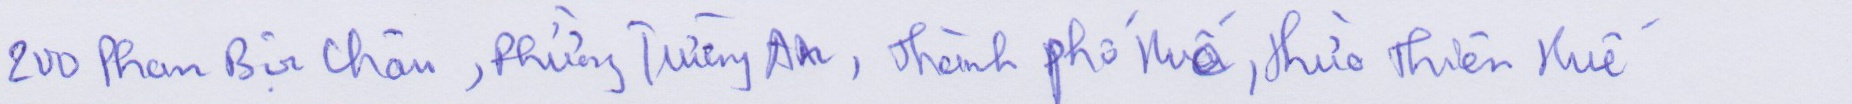

In [7]:
path = 'data/data_v2/train/img/address_2.png'
print(tester.predict(path))
Image.open(path)


# Dự đoán nhiều ảnh

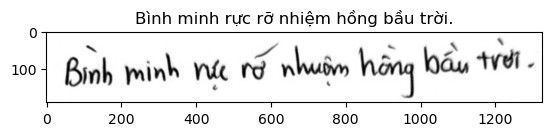

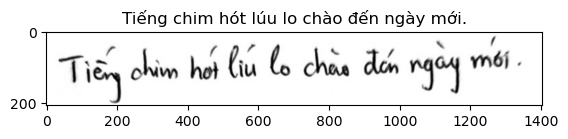

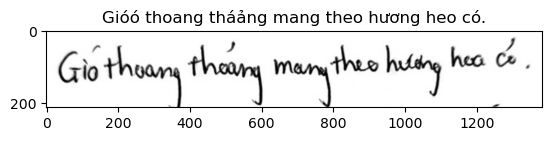

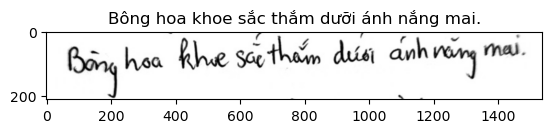

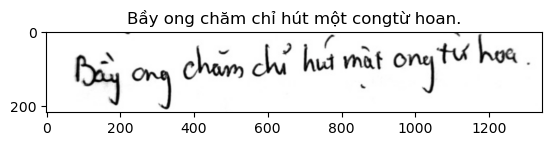

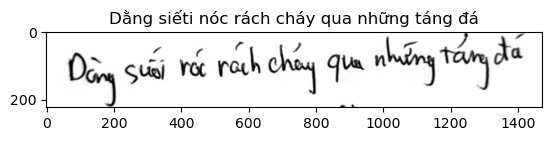

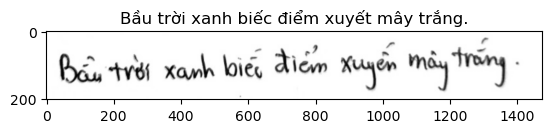

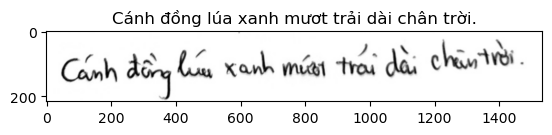

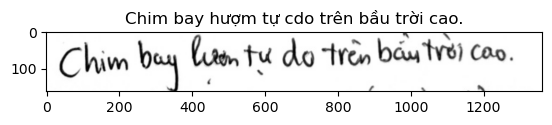

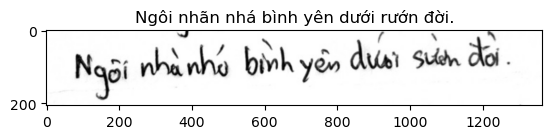

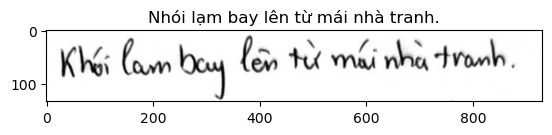

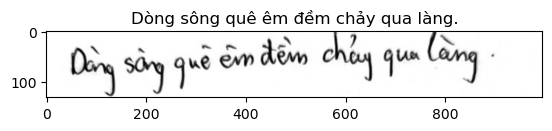

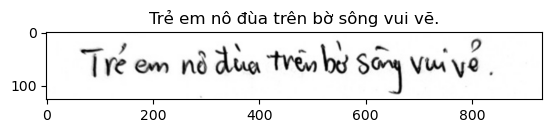

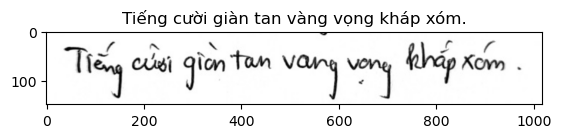

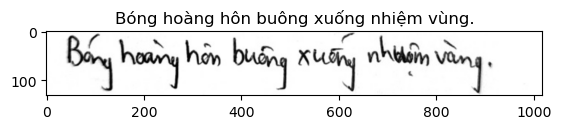

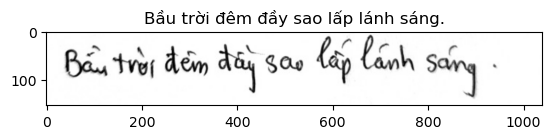

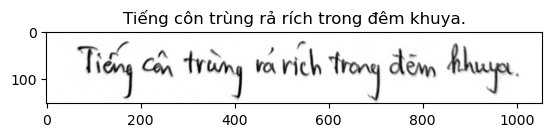

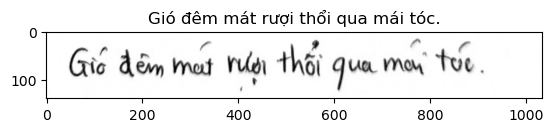

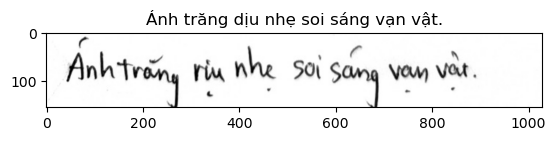

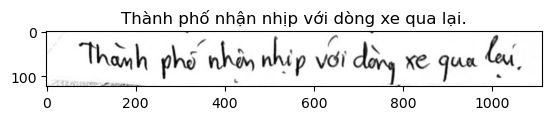

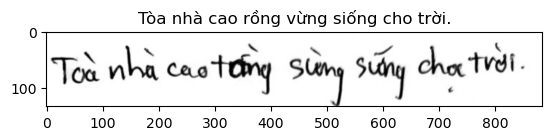

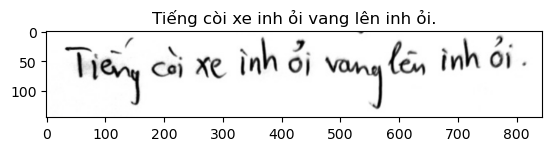

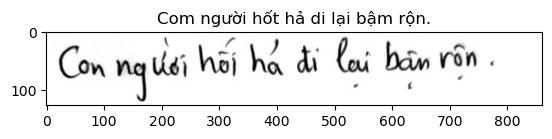

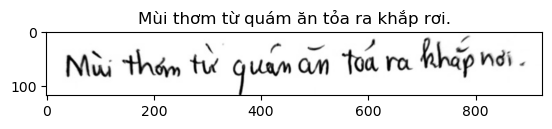

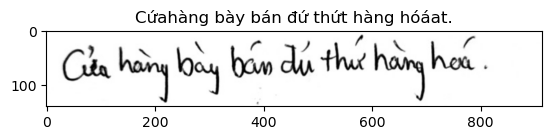

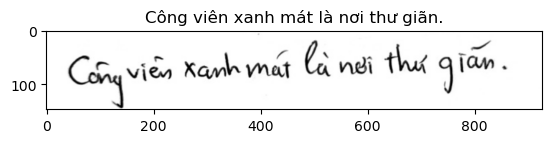

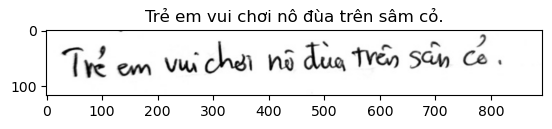

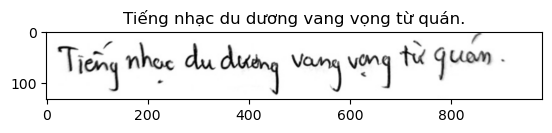

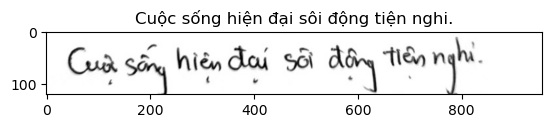

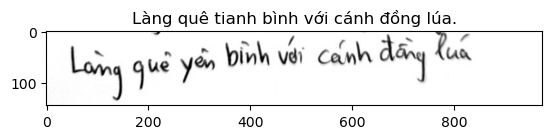

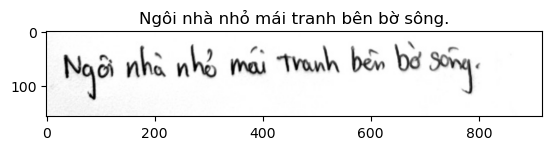

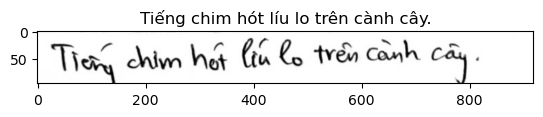

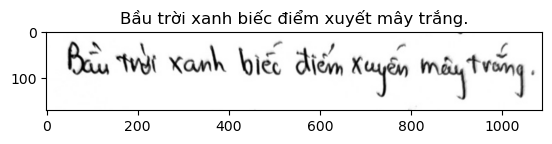

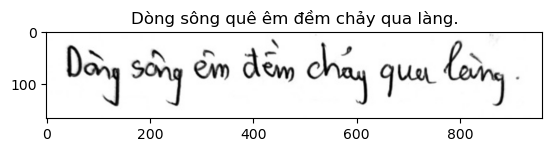

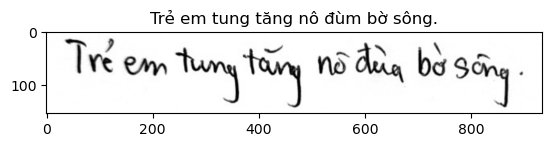

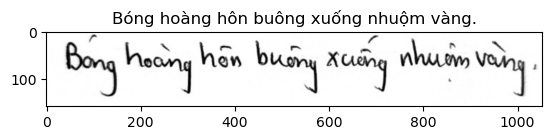

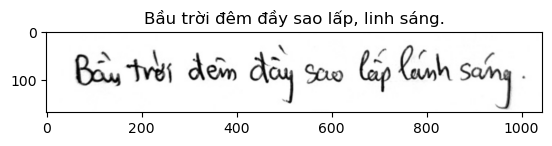

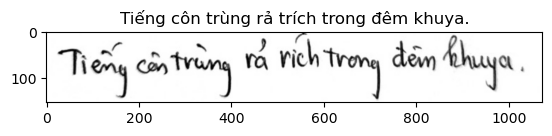

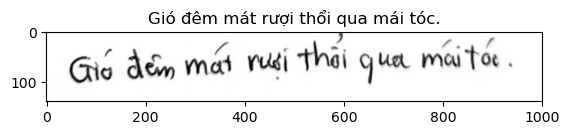

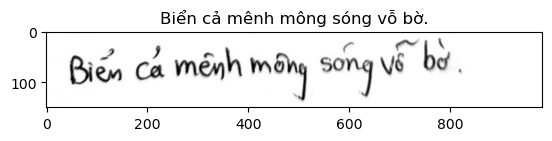

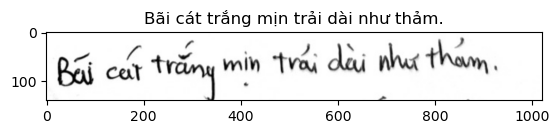

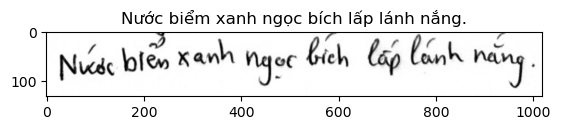

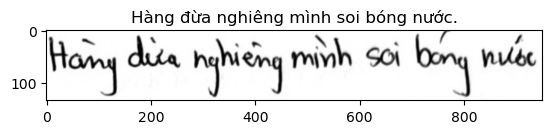

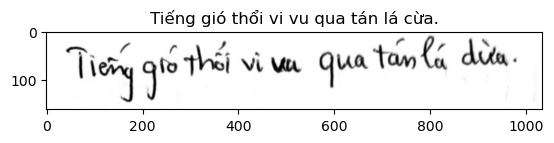

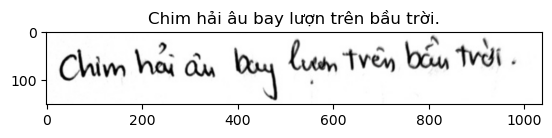

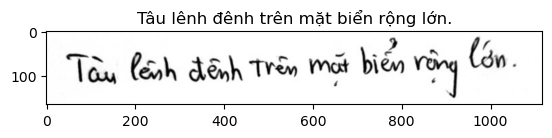

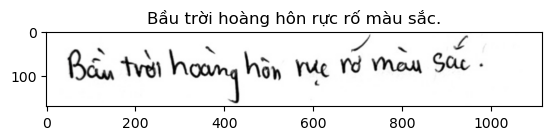

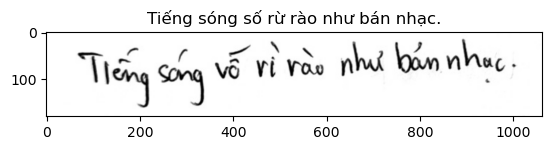

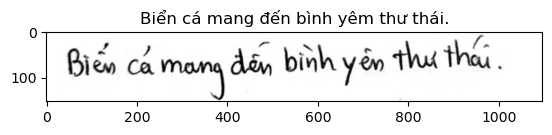

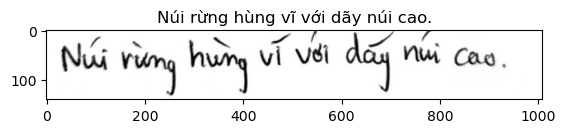

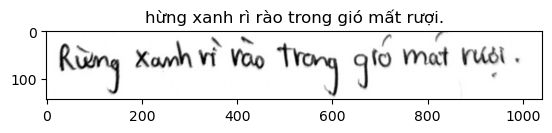

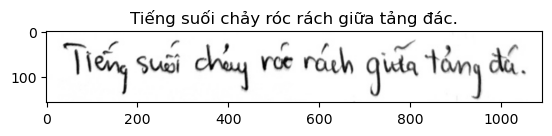

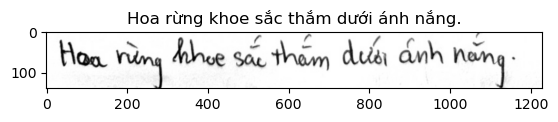

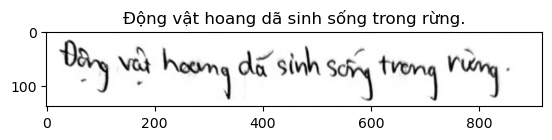

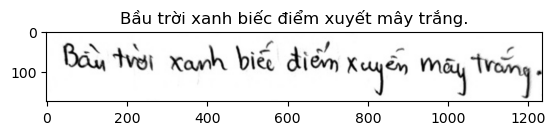

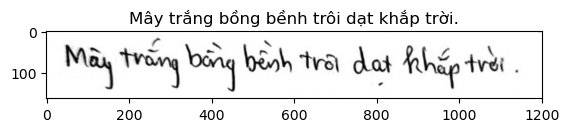

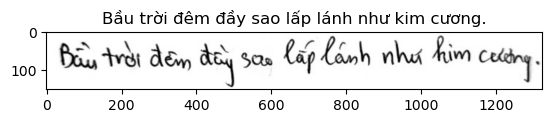

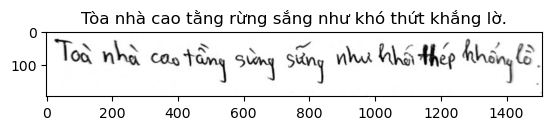

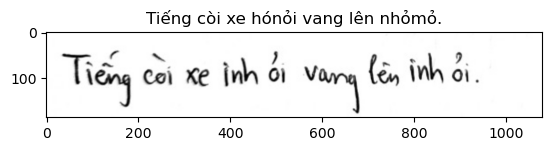

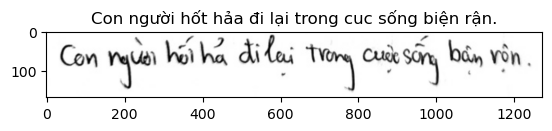

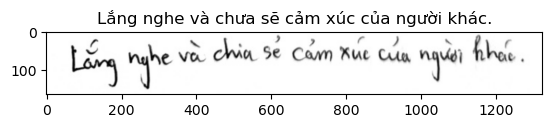

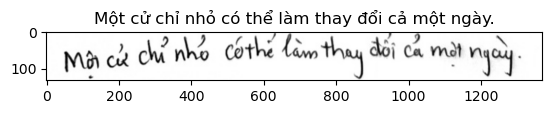

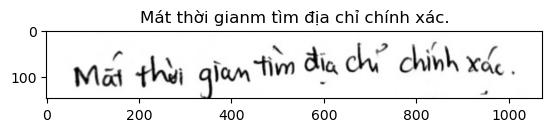

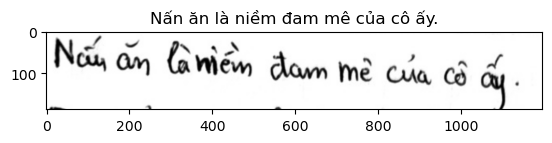

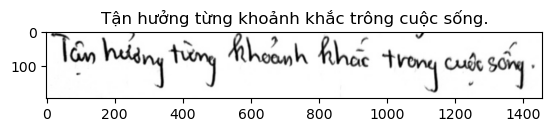

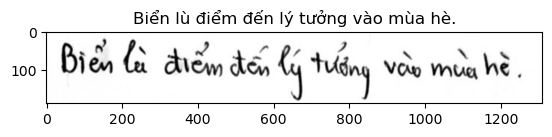

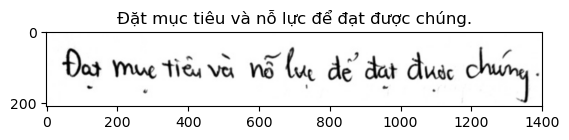

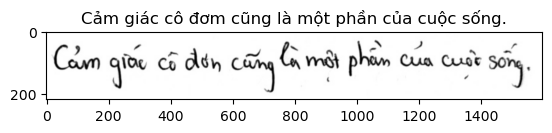

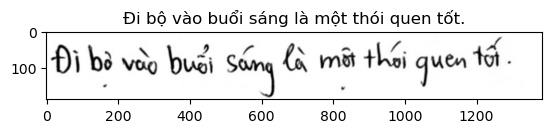

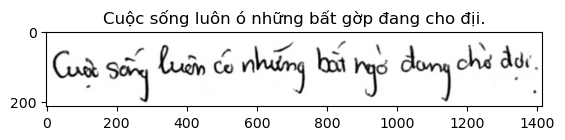

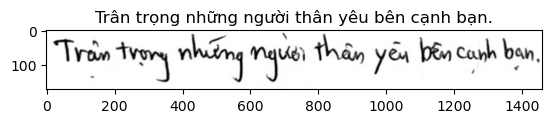

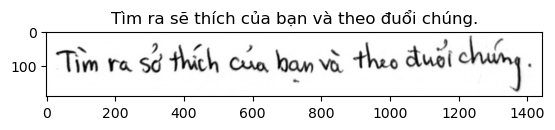

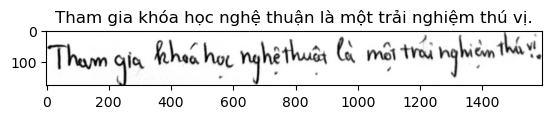

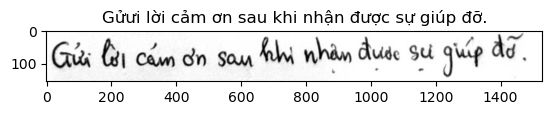

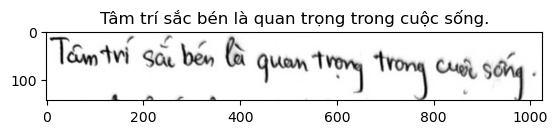

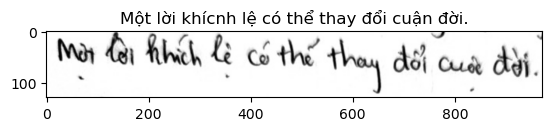

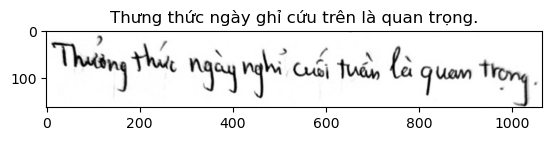

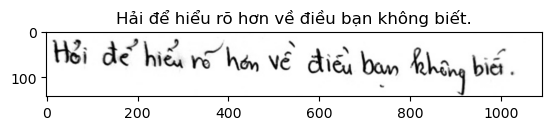

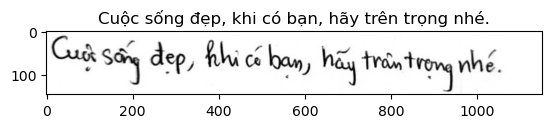

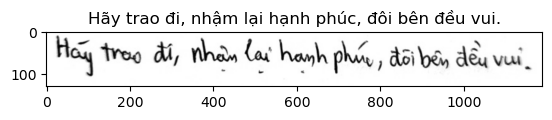

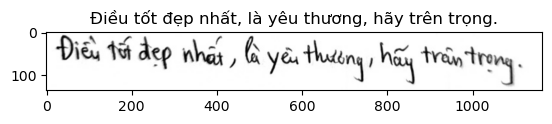

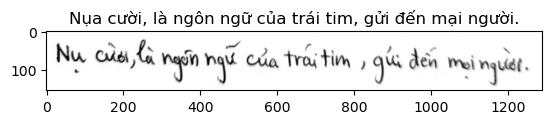

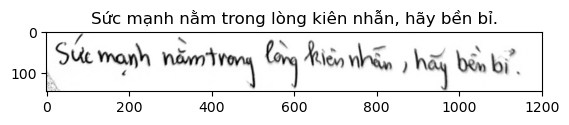

In [8]:
from PIL import Image
import matplotlib.pyplot as plt

root = 'D:/HUST/20232/ML/Project_OCR/HandwritingRecognition/data/raw/fulldata/img'
for i, path in enumerate(os.listdir(root)):
    if 'tandat' in path:
        imgpath = root + '/' + path
        img = Image.open(imgpath)
        plt.imshow(img)
        plt.title(tester.predict(imgpath))
        plt.show()
        